# Permuataion Test

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\hamin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [17]:
# Sample data for Page A and Page B
np.random.seed(42)  # For reproducibility

# Generate sample session times (in seconds) for Page A and Page B
# Note: These are just illustrative numbers and may not reflect real-world data

# Generate random session times for Page A (21 entries) and Page B (15 entries)
# Assuming session times are between 60 seconds (1 minute) and 300 seconds (5 minutes)
session_times_A = np.random.randint(0, 301, 21).tolist()
session_times_B = np.random.randint(0, 301, 15).tolist()

# Remove zeros (last session time recorded as zero)
session_times_A = [time for time in session_times_A if time != 0]
session_times_B = [time for time in session_times_B if time != 0]

# Print the lists
print("Session Times for Page A:", session_times_A)
print("Session Times for Page B:", session_times_B)

Session Times for Page A: [102, 270, 106, 71, 188, 20, 102, 121, 214, 87, 99, 151, 130, 149, 257, 293, 191, 276, 160, 21, 252]
Session Times for Page B: [235, 48, 58, 169, 187, 270, 189, 174, 50, 54, 243, 130, 134, 20, 166]


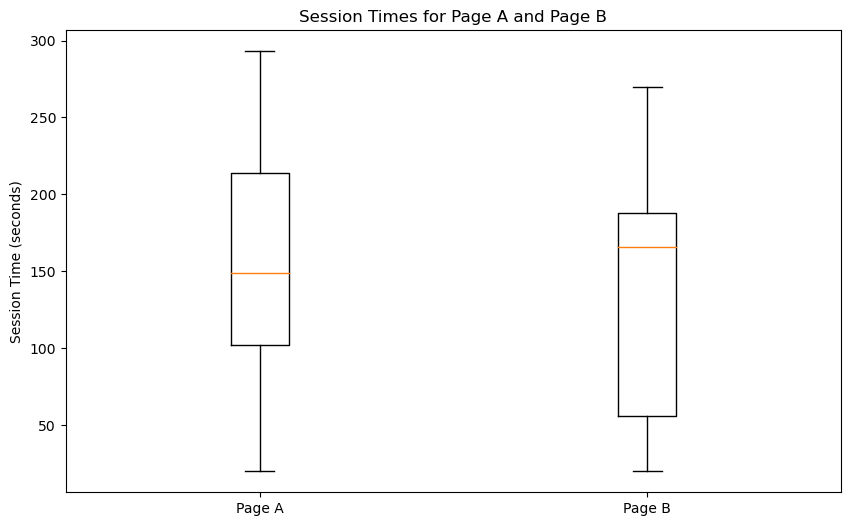

In [18]:
# Plot the session times using a boxplot
plt.figure(figsize=(10, 6))

# Create boxplot
plt.boxplot([session_times_A, session_times_B], labels=['Page A', 'Page B'])

# Adding titles and labels
plt.title('Session Times for Page A and Page B')
plt.ylabel('Session Time (seconds)')

# Show the plot
plt.show()

## With Replacement

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

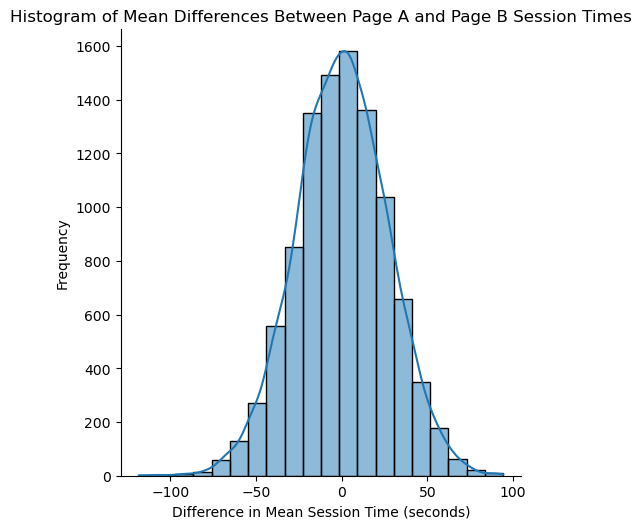

In [25]:
all_session_times = session_times_A + session_times_B

# Initialize the list to store differences
difference_list = []

# Perform the sampling and difference calculation 100 times
for _ in range(10000):
    list_A = [np.random.choice(all_session_times) for _ in range(len(session_times_A))]
    list_B = [np.random.choice(all_session_times) for _ in range(len(session_times_B))]
    difference_list.append(np.mean(list_A) - np.mean(list_B))

# Plot the histogram of differences
plt.figure(figsize=(10, 6))
sns.displot(difference_list, bins=20, edgecolor='black', kde = True)
plt.title('Histogram of Mean Differences Between Page A and Page B Session Times')
plt.xlabel('Difference in Mean Session Time (seconds)')
plt.ylabel('Frequency')
plt.show()

## Without Replacement

c:\Users\hamin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


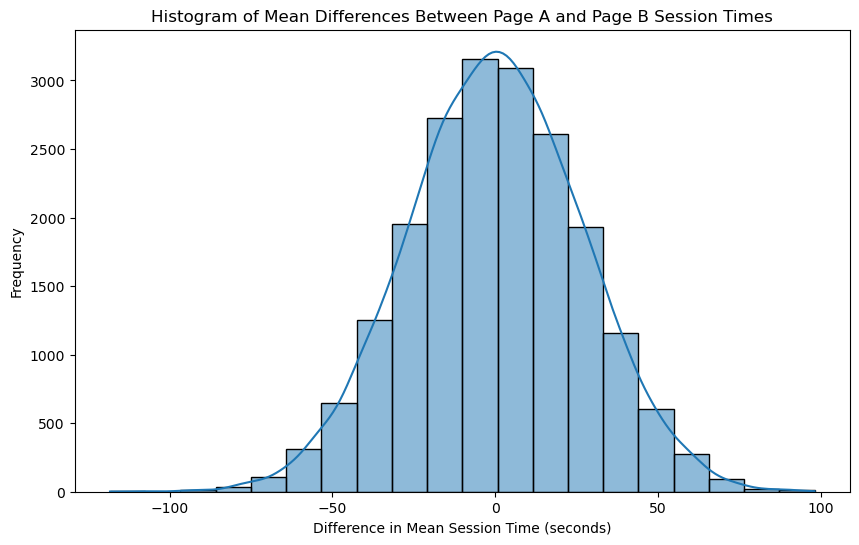

In [26]:
# Perform the sampling and difference calculation 10000 times
for _ in range(10000):
    # Sample without replacement
    sampled_times = np.random.choice(all_session_times, len(session_times_A) + len(session_times_B), replace=False)
    list_A = sampled_times[:len(session_times_A)]
    list_B = sampled_times[len(session_times_A):]
    difference_list.append(np.mean(list_A) - np.mean(list_B))

# Plot the histogram of differences
plt.figure(figsize=(10, 6))
sns.histplot(difference_list, bins=20, edgecolor='black', kde=True)
plt.title('Histogram of Mean Differences Between Page A and Page B Session Times')
plt.xlabel('Difference in Mean Session Time (seconds)')
plt.ylabel('Frequency')
plt.show()